## Neste projeto, faremos uma análise de uma base de dados que contém o índice de felicidade de 158 países, contendo também os valores dos fatores que somados resultam no índice. Nossa análise será majoritariamente baseada em visualização de dados.

In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df2015 = pd.read_csv("Downloads\\2015.csv")

In [74]:
df2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#### Note, acima, que a pontuação de cada país é a soma do valor dos fatores, subtraindo o erro padrão.

In [75]:
df2015 = df2015.set_index("Happiness Rank")
df2015

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
154,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [76]:
média2015 = df2015["Happiness Score"].mean()
print(média2015)

5.3757341772151905


In [77]:
# Aqui, criaremos uma lista com os países que possuem pontuações acima da média. Chamemos a lista de "melhores"
melhores = df2015.loc[df2015["Happiness Score"] >= média2015,"Country"].tolist()

In [78]:
print(melhores)

['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel', 'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil', 'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates', 'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama', 'Germany', 'Chile', 'Qatar', 'France', 'Argentina', 'Czech Republic', 'Uruguay', 'Colombia', 'Thailand', 'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname', 'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan', 'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy', 'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia', 'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia', 'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus', 'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong', 'Estonia', 'Indonesia']


In [79]:
if "Brazil" in melhores:
    print("O Brasil é um país mais feliz do que a média")
else:
    print("O Brasil é um país menos feliz do que a média")

O Brasil é um país mais feliz do que a média


In [80]:
if "Angola" in melhores:
    print("Angola é um país mais feliz do que a média")
else:
    print("Angola é um país menos feliz do que a média")

Angola é um país menos feliz do que a média


<AxesSubplot:>

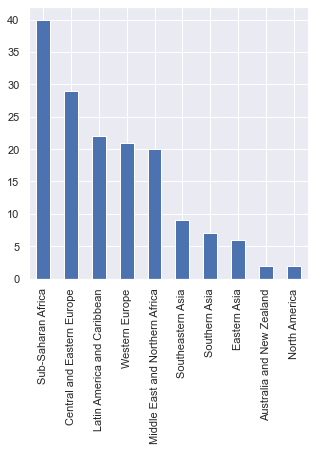

In [81]:
# Aqui, veremos quantos países há, no dataframe, de cada região.
df2015.Region.value_counts().plot(kind='bar')

#### O resultado acima é bem esperado, pois realmente parece-se com a distribuição de países em cada região (realmente, há mais países na África Sub-saariana do que na América Latina e Caribenha - e por aí vai. Para seguirmos com nossa análise, plotaremos um histograma para cada coluna que contém os valores dos fatores, para sabermos a distribuição de cada um.

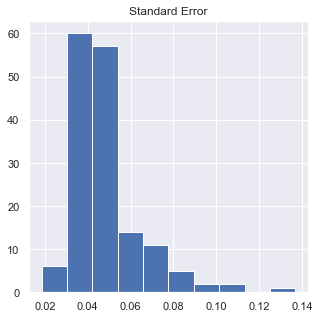

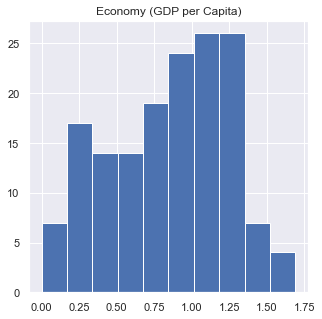

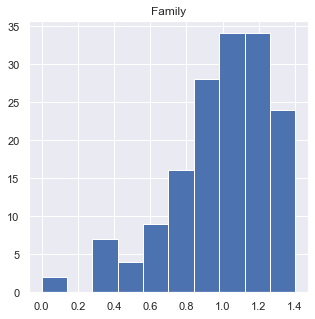

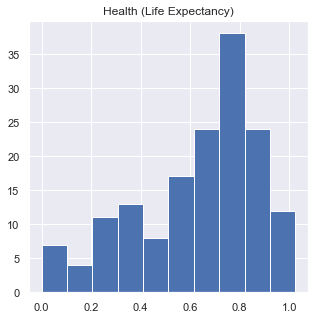

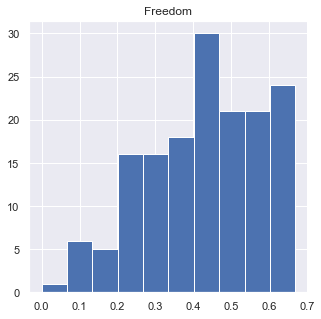

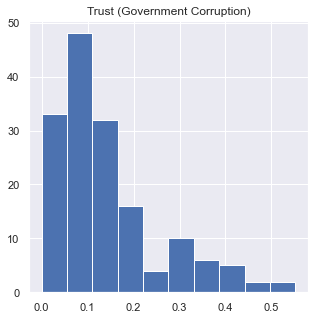

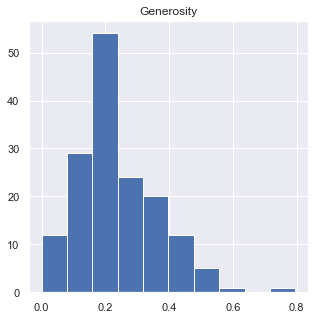

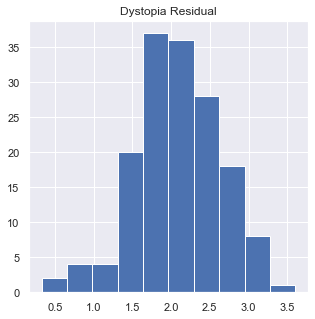

In [82]:
sns.set()
for i in df2015.columns[3:]:
    plt.hist(df2015[i], bins = 10)
    plt.title(i)
    plt.show()

#### Acima, notamos algumas coisas: 
i) o erro padrão não tem uma distribuição normal;
ii) o PIB per capita é bem distribuído;
iii) o fator "família" tem uma distribuição parecida com a normal, porém deslocada para a direita;
iv) a expectativa de vida é bem distribuída;
v) o fator "liberdade" é bem distribuído;
vi) a corrupção é muito mal distribuída;
vii) a generosidade é relativamente bem distribuída, porém com alguns valores muito maiores do que a maioria;
viii) o residual de distopia é relativamente bem distribuída, porém com alguns valores consideravelmente menores do que a maioria.
#### Todas essas observações serão corroboradas pelos seguintes gráficos de box-plot. Quão melhor distribuídos forem os valores, menos outliers (pontos soltos no gráfico) haverão.

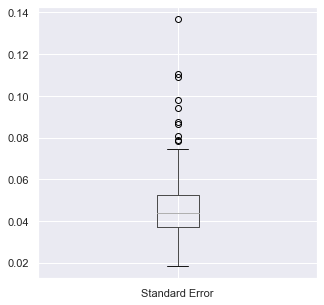

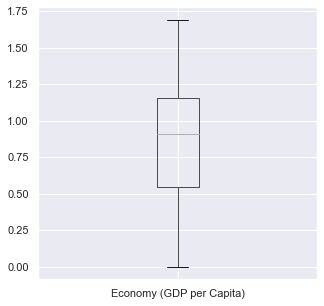

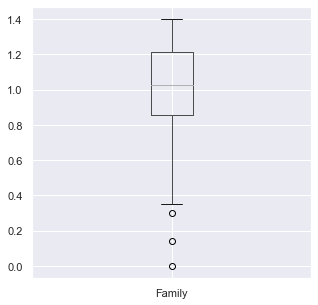

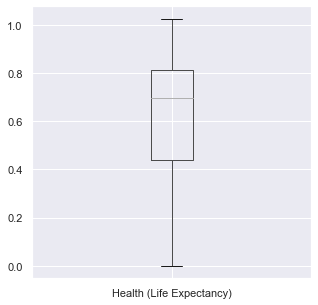

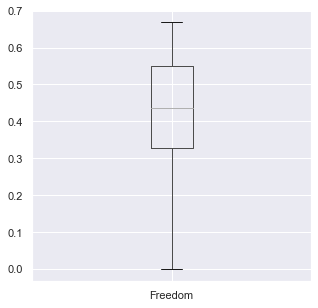

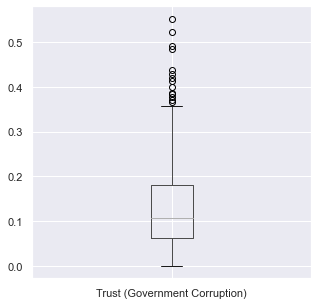

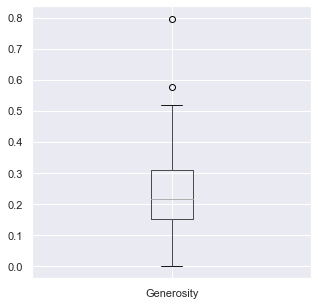

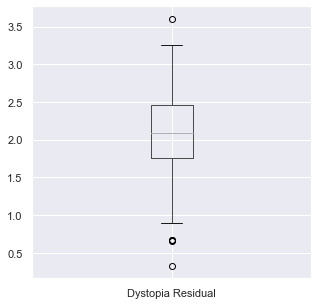

In [83]:
sns.set()
for i in df2015.columns[3:]:
    df2015.boxplot(column =i)
    plt.show()

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

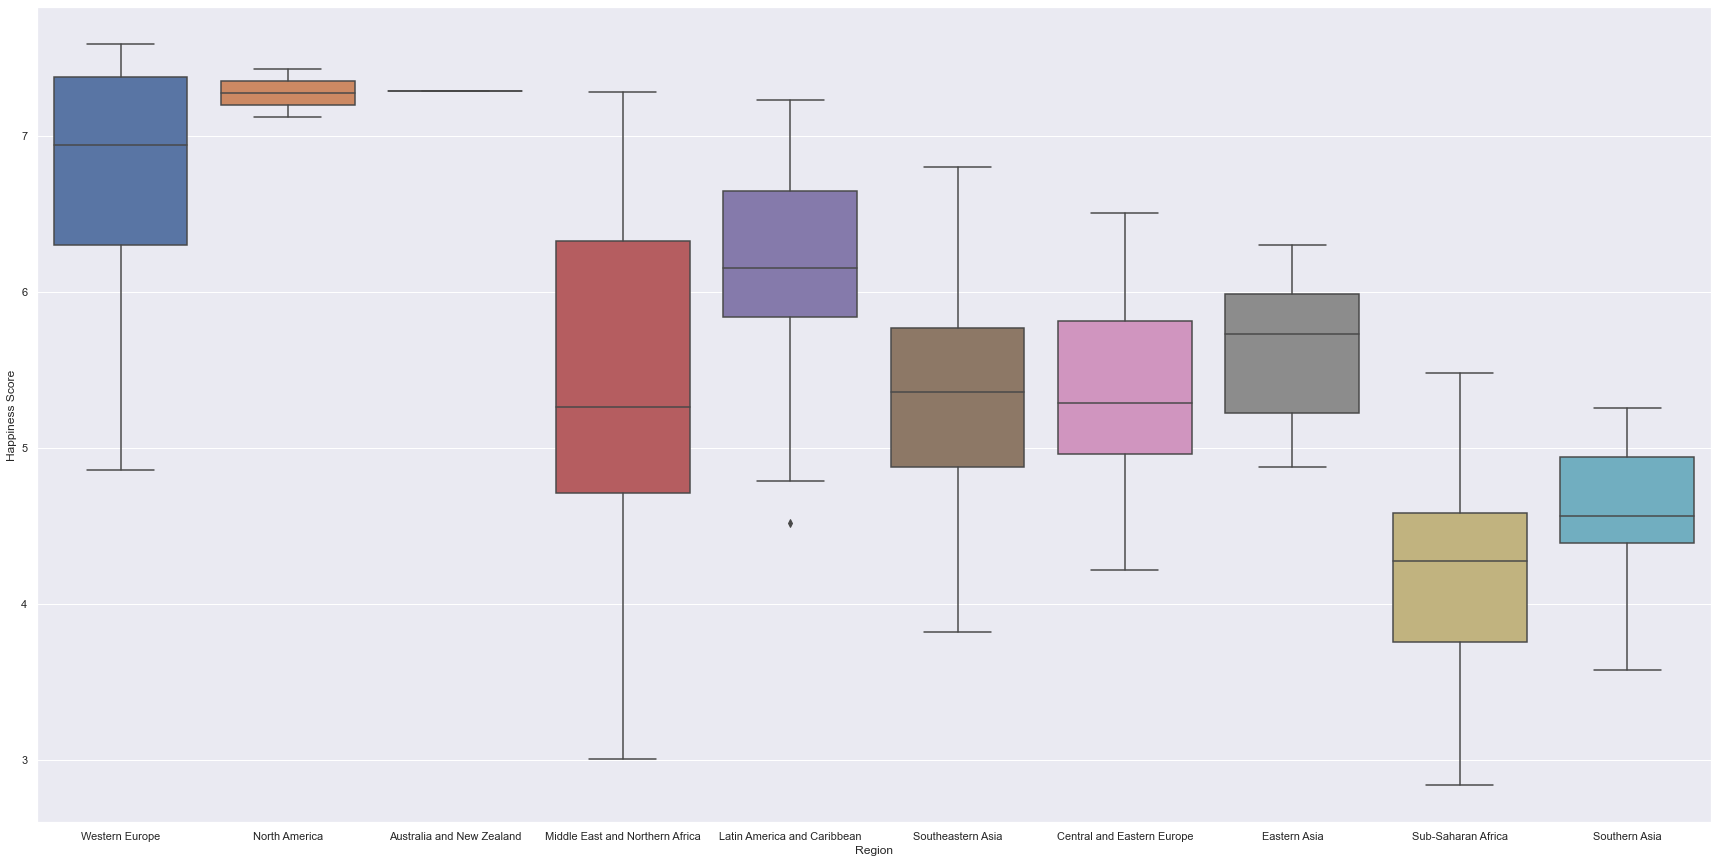

In [85]:
# Agora, faremos um gráfico de box-plot para observarmos a distribuição da pontuação do índice para cada região.
sns.set(rc={'figure.figsize':(30,15)})
sns.boxplot(x = "Region", y = 'Happiness Score', data = df2015)

In [43]:
# Percebemos que apenas em um box-plot há um outlier. Como é apenas um, e é o menor valor, podemos filtrar pelo valor mínimo e encontrar qual é o país correspondente.
min_latam_car = df2015[df2015["Region"] == "Latin America and Caribbean"]["Happiness Score"].min()
df2015[df2015["Happiness Score"] == min_latam_car]

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
119,Haiti,Latin America and Caribbean,4.518,0.07331,0.26673,0.74302,0.38847,0.24425,0.17175,0.46187,2.24173


#### Plotaremos um gráfico de scatter relacionando os fatores que contribuem para a pontuação com a própria pontuação. Isto servirá para introduzir uma análise que aprofundaremos ao decorrer do projeto.

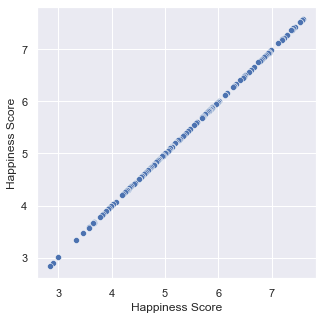

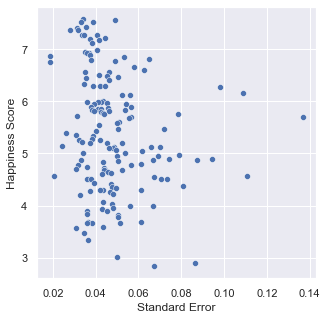

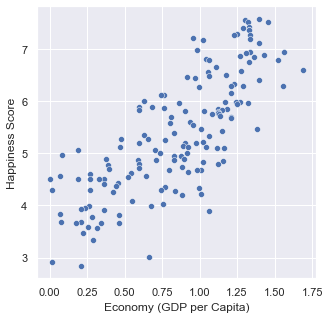

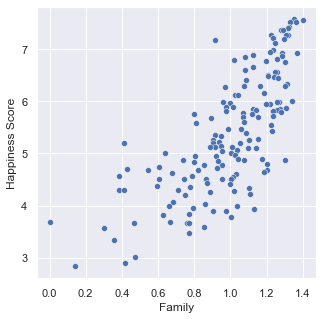

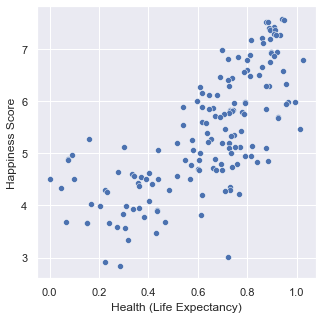

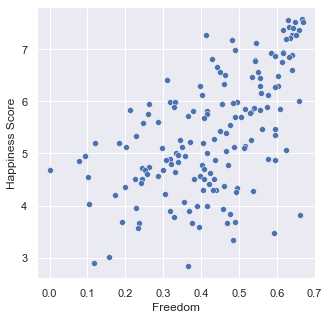

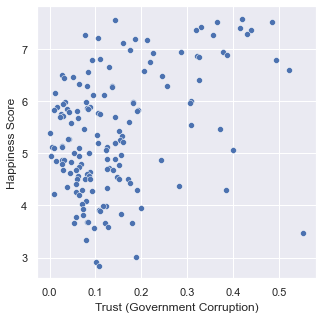

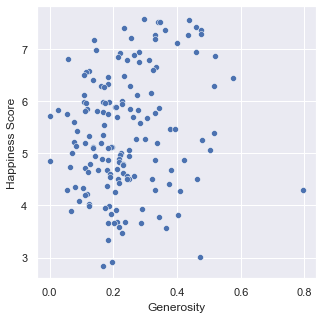

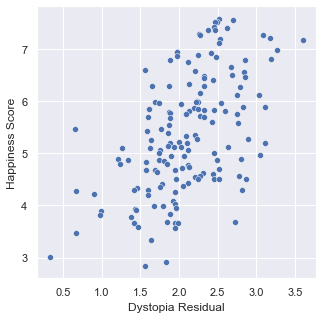

In [44]:
sns.set(rc={'figure.figsize':(5,5)})
for i in df2015.columns[2:]:
    plt.figure()
    sns.scatterplot( x = df2015[i], y= "Happiness Score", data= df2015)

In [45]:
# Aqui, faremos a matriz de correlação entre as variáveis.
df2015.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

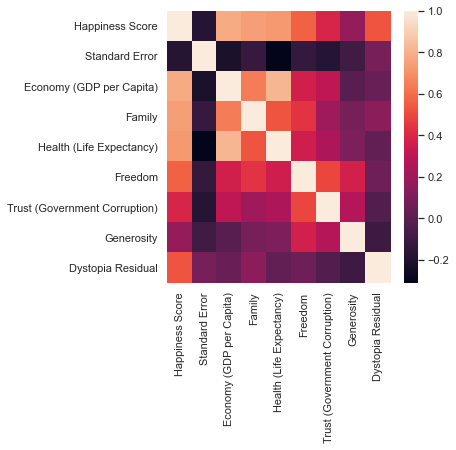

In [46]:
# Isto é o mapa de calor da matriz de correlação: quão maior for o valor da correlação, mais forte será a cor no mapa. 
sns.heatmap(df2015.corr())

#### Agora, é hora de aprofundar a análise. Para isso, escolheremos cinco colunas (que julgo serem as mais importantes) para rodarmos regressões lineares de par em par. 
   

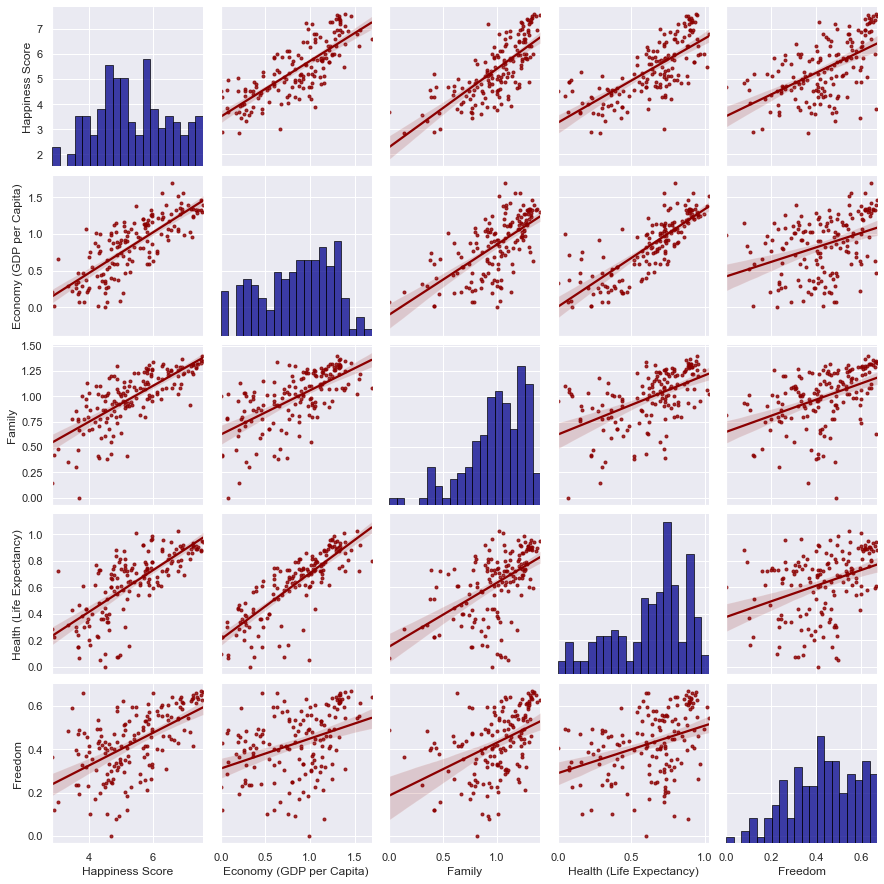

In [47]:
data = df2015[["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom"]].copy()
sns.pairplot(data = data, kind='reg', diag_kws={'bins':20, 'color':'darkblue','edgecolor':'black'},
            plot_kws={'marker':'.','color':'darkred'})

In [86]:
# Calculando a média de pontuação para cada região
scores_medios = df2015.groupby(by= "Region")['Happiness Score'].mean()
scores_medios

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [87]:
# Calculando os desvios-padrão para cada região
desvios = scores_medios = df2015.groupby(by= "Region")['Happiness Score'].std()
desvios

Region
Australia and New Zealand          0.001414
Central and Eastern Europe         0.570446
Eastern Asia                       0.554053
Latin America and Caribbean        0.728560
Middle East and Northern Africa    1.101382
North America                      0.217789
Southeastern Asia                  0.950020
Southern Asia                      0.570526
Sub-Saharan Africa                 0.609557
Western Europe                     0.824582
Name: Happiness Score, dtype: float64

<AxesSubplot:xlabel='Region'>

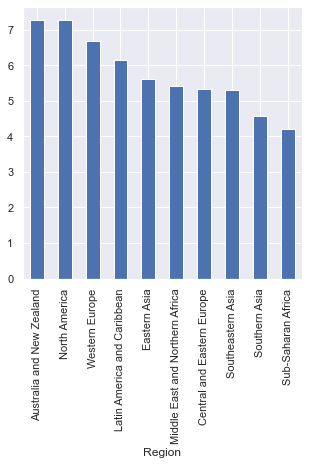

In [49]:
scores_medios.sort_values(ascending = False).plot.bar()

In [55]:
média_score = df2015["Happiness Score"].mean()
print(média_score)

5.3757341772151905


In [54]:
# Criando uma nova coluna com o score do país subtraída da média de scores.
df2015["Score - Média"] = df2015["Happiness Score"] - média_score

In [58]:
df2015

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Score - Média
Happiness Rank,,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2.211266
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2.185266
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2.151266
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2.146266
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2.051266
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,-1.910734
155,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,-2.035734
156,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,-2.369734


In [88]:
# Como vimos no começo da análise, o Brasil é um país acima da média no quesito felicidade. Com isso, esperamos que o valor na nova coluna seja positivo.
df2015[df2015["Country"] == "Brazil"]

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
16,Brazil,Latin America and Caribbean,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001


In [89]:
# Analogamente, esperamos que o valor para a Angola seja negativo
df2015[df2015["Country"] == "Angola"]

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
137,Angola,Sub-Saharan Africa,4.033,0.04758,0.75778,0.8604,0.16683,0.10384,0.07122,0.12344,1.94939
